In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [3]:
df = pd.read_csv('sales.csv')
origin_df = df
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [4]:
df.shape

(29922, 6)

In [5]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes (Task1)

Change ordered_at to datetime

Change price and line_total to float

####  Solution:

Remove the dollar sign "$" then convert "price" and "line_total" data to float:

_ Some ways to remove "$":

1. Iterate the DataFrame using DataFrame.iterrows():

In [6]:
for index, row in df.iterrows():
    df.loc[index,'price']= row['price'].replace("$","")
    df.loc[index,'line_total'] = row['line_total'].replace("$","")
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.50,3,10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.50,1,3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.50,2,5.00
3,10001,NaN,2018-01-01 12:14:54,1.50,1,1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.50,1,3.50
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.00,1,3.00
6,10002,NaN,2018-01-01 12:23:09,3.00,3,9.00
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.50,3,1.50
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.50,3,4.50
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.50,2,5.00


2. Use DataFrame.apply(func, axis=1):

In [7]:
df = origin_df
def remove_dollar(args):
    return pd.Series([args['price'].replace("$",""), args['line_total'].replace("$","")])
df[['price','line_total']] = df[['price','line_total']].apply(remove_dollar, axis=1)
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.50,3,10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.50,1,3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.50,2,5.00
3,10001,NaN,2018-01-01 12:14:54,1.50,1,1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.50,1,3.50
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.00,1,3.00
6,10002,NaN,2018-01-01 12:23:09,3.00,3,9.00
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.50,3,1.50
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.50,3,4.50
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.50,2,5.00


3. Use pandas.Series.str:

In [8]:
df = origin_df
df['price'] = df['price'].str.replace("$","")
df['line_total'] = df['line_total'].str.replace("$","")
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.50,3,10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.50,1,3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.50,2,5.00
3,10001,NaN,2018-01-01 12:14:54,1.50,1,1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.50,1,3.50
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.00,1,3.00
6,10002,NaN,2018-01-01 12:23:09,3.00,3,9.00
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.50,3,1.50
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.50,3,4.50
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.50,2,5.00


_ Change "price" and "line_total" data to type float:

In [9]:
df[['price','line_total']] = df[['price','line_total']].astype("float")

_ Change "ordered_at" data to type datetime:

In [10]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

####  Result task 1:

In [11]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null (Task 2)

#### Solution

#### Delete duplicated data:

Current DataFrame length:

In [12]:
curr_len = df.shape[0]
curr_len

29922

Duplicated DataFrame length:

In [13]:
duplicated_len = df[df.duplicated()].shape[0]
duplicated_len

538

Drop duplicates in DataFrame:

In [14]:
df = df.drop_duplicates()
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.5,3,1.5
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0


After dropped duplicates, DataFrame length:

In [15]:
after_len = df.shape[0]
after_len

29384

#### Delete null data:

Count rows containing NaN:

In [16]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [17]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


Delete rows that containing NaN:

In [18]:
df = df.dropna()
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.5,3,1.5
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0
10,10004,"""BEVERAGE"" Espresso",2018-01-01 13:22:59,2.5,1,2.5
11,10004,"""ICE CREAM"" Mint Chip",2018-01-01 13:22:59,1.5,2,3.0


#### Sanity check for value ranges and to check assumptions

In [19]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [20]:
df[df['line_total'] < 0].shape[0]

279

#### TODO:  Task 3
Set line_total = price * quantity if different
Remove if line total < 0

In [21]:
df = df[df['line_total']>0]

In [44]:
# pd.options.mode.chained_assignment = None
df=df.copy(deep=True)
df.loc['line_total'] = df['price']*df['quantity']

#### Check Result:

In [45]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

1

In [41]:
df[df['line_total'] < 0].shape[0]

0

In [25]:
df.describe()

,order_id,price,quantity,line_total
count,27622.000000,27622.000000,27622.00000,27622.000000
mean,14993.832380,2.511838,2.00076,5.029035
std,2888.574413,1.059174,0.81944,3.085331
min,10000.000000,0.500000,1.00000,0.500000
25%,12501.250000,1.500000,1.00000,2.500000
50%,14973.000000,2.500000,2.00000,4.500000
75%,17507.000000,3.500000,3.00000,7.500000
max,19999.000000,4.000000,3.00000,12.000000


#### TODO: Get value between "" in name and put it in category column Task 4

In [42]:
df['category'] = df['name'].str.split('"').str[1]
df['name'] = df['name'].str.split('"').str[2]

In [27]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

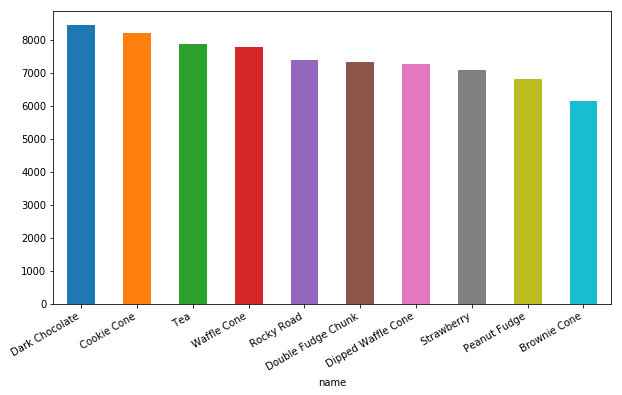

In [28]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()